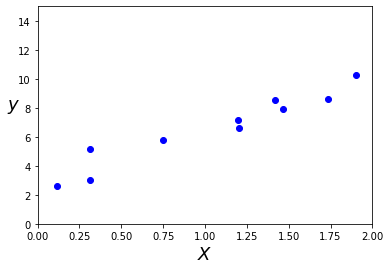

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(10)
y = 4 + 3 * X + np.random.randn(10)

plt.plot(X, y, "bo")
plt.xlabel("$X$", fontsize=18)  # 自带 letax 语法 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

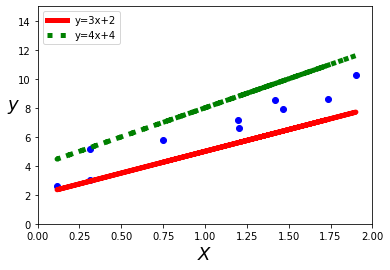

In [3]:
# 绘制 y=3x+2 和 y=4x+4 两条直线
plt.plot(X, y, "bo")
plt.plot(X, 3*X+2, "r-", lw="5", label = "y=3x+2")
plt.plot(X, 4*X+4, "g:", lw="5", label = "y=4x+4")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.show()

Text(0.5, 0.98, 'Calculate loss')

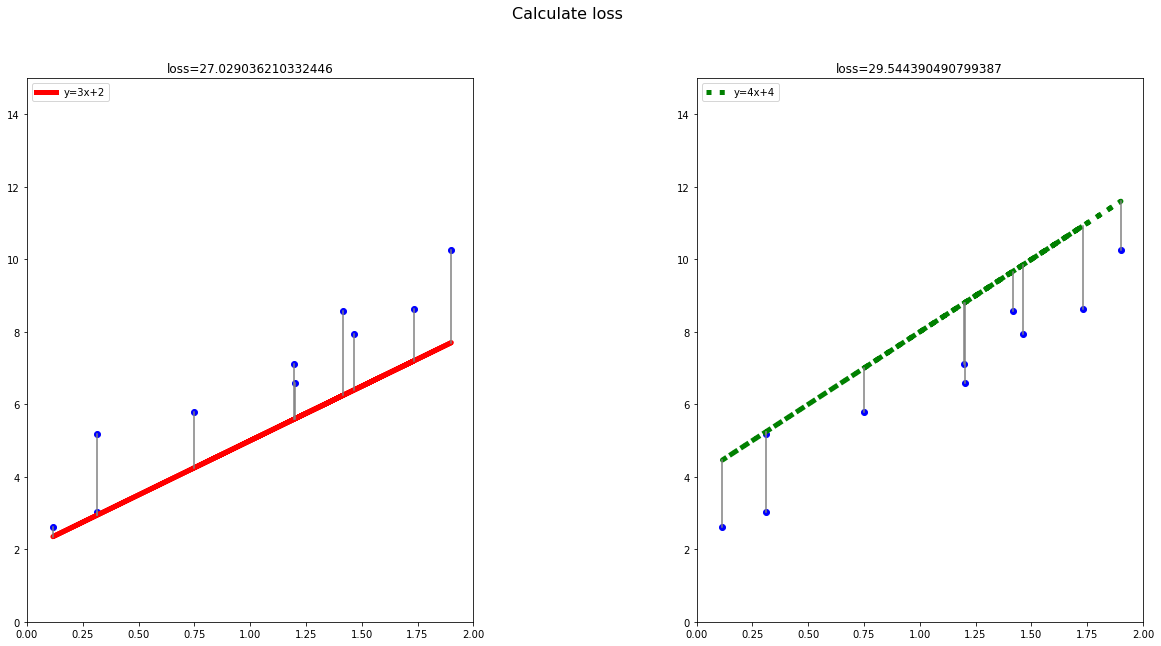

In [6]:
# 计算损失，并比较 y=3x+2 和 y=4x+4 两条直线：
fig, ax_list = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax_list[0].plot(X, y, "bo")
ax_list[0].plot(X, 3*X+2, "r-", lw="5", label = "y=3x+2")

loss = 0

for i in range(10):
    ax_list[0].plot([X[i],X[i]], [y[i],3*X[i]+2], color='grey')
    loss= loss + np.square(3*X[i]+2-y[i])
    pass

ax_list[0].axis([0, 2, 0, 15])  # xy 轴的坐标
ax_list[0].legend(loc="upper left")
ax_list[0].title.set_text('loss=%s'%loss)

ax_list[1].plot(X, y, "bo")
ax_list[1].plot(X, 4*X+4, "g:", lw="5", label = "y=4x+4")

loss = 0
for i in range(10):
    ax_list[1].plot([X[i],X[i]], [y[i],4*X[i]+4], color='grey')
    loss= loss + np.square(4*X[i]+4-y[i])
    pass

ax_list[1].axis([0, 2, 0, 15])
ax_list[1].legend(loc="upper left")
ax_list[1].title.set_text('loss=%s'%loss)

fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Calculate loss", fontsize=16)

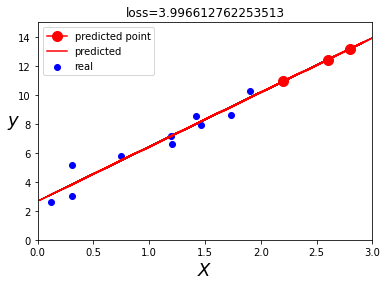

In [33]:
# 训练模型，并预测：
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y.reshape(-1,1))  # 一维转二维度

X_test = np.array([2.2, 2.6, 2.8]).reshape(-1,1)
# X_test = [[2.2],[2.6],[2.8]] 不同写法
y_test = lr.predict(X_test)

X_pred = 3 * np.random.rand(100, 1)
y_pred = lr.predict(X_pred)

plt.scatter(X,y, c='b', label='real')
plt.plot(X_test,y_test, 'r', label='predicted point' ,marker=".", ms=20)
plt.plot(X_pred,y_pred, 'r-', label='predicted')

plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.axis([0, 3, 0, 15])
plt.legend(loc="upper left")

loss = 0
for i in range(10):
    loss = loss + np.square([[y[i]]]-lr.predict([[X[i]]])).flatten()[0]

plt.title(f"loss={loss}")
plt.show()